# Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Priklad 1. Dataframe

In [2]:
zviera = ['slimak', 'prasa', 'slon', 'kralik', 'zirafa', 'kon']
rychlost = [0.1, 17.5, 40, 48, 52, 88]
zivotnost = [2, 8, 70, 1.5, 25, 28]
df = pd.DataFrame({'rychlost': rychlost, 'zivotnost': zivotnost}, index = zviera)
df

,rychlost,zivotnost
slimak,0.1,2.0
prasa,17.5,8.0
slon,40.0,70.0
kralik,48.0,1.5
zirafa,52.0,25.0
kon,88.0,28.0


In [3]:
df.shape

(6, 2)

In [4]:
df.index

Index(['slimak', 'prasa', 'slon', 'kralik', 'zirafa', 'kon'], dtype='object')

In [5]:
df.columns

Index(['rychlost', 'zivotnost'], dtype='object')

In [6]:
df.values

array([[ 0.1,  2. ],
       [17.5,  8. ],
       [40. , 70. ],
       [48. ,  1.5],
       [52. , 25. ],
       [88. , 28. ]])

In [7]:
df['zivotnost']

slimak     2.0
prasa      8.0
slon      70.0
kralik     1.5
zirafa    25.0
kon       28.0
Name: zivotnost, dtype: float64

In [8]:
df['zivotnost'].min()

1.5

In [9]:
df['zivotnost']>10

slimak    False
prasa     False
slon       True
kralik    False
zirafa     True
kon        True
Name: zivotnost, dtype: bool

In [10]:
# filtrovanie pomocou masky
df[df['zivotnost']>10]

,rychlost,zivotnost
slon,40.0,70.0
zirafa,52.0,25.0
kon,88.0,28.0


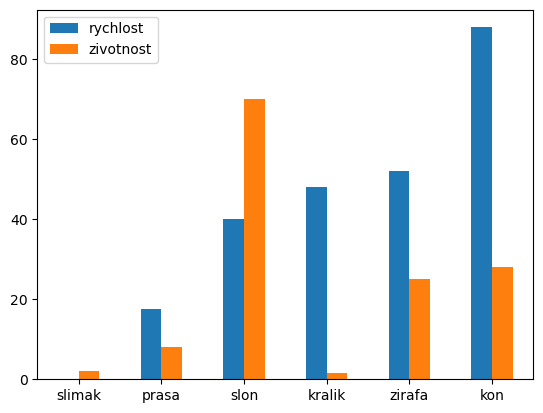

In [11]:
# vizualizacia
df.plot.bar(rot=0);

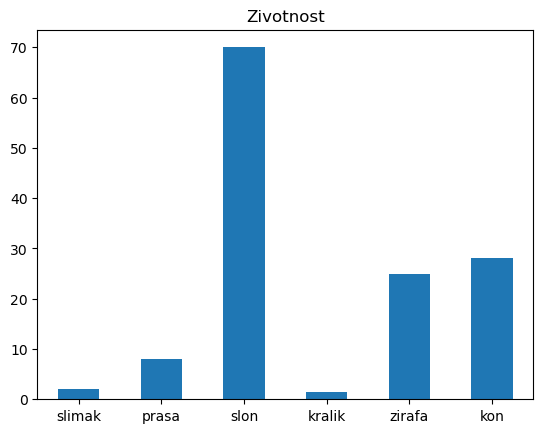

In [12]:
df['zivotnost'].plot.bar(rot=0);
plt.title("Zivotnost");

### Priklad 2. Nacitanie zo suboru

https://data.gov.sk/dataset/statistika-navstevnosti-a-trzieb-slovenskeho-banskeho-muzea-v-banskej-stiavnici

In [13]:
df = pd.read_csv('sbm.navstevnost2019.csv')

In [14]:
df.head(10)

,_id,Id,Expozicia,Rok,Mesiac,Navstevnost,Trzby,Skolaci,Cudzinci,Zdarma
0,1,1,Banské múzeum v prírode,2019,1,48,132,36,0,7
1,2,2,Nový zámok,2019,1,298,669,0,52,19
2,3,3,Starý zámok,2019,1,405,"1576,5",0,90,42
3,4,4,Kammerhof-baníctvo na Slovensku,2019,1,44,111,0,7,1
4,5,5,Berggericht-mineralogická expozícia,2019,1,139,354,0,19,11
5,6,6,Galéria Jozefa Kollára,2019,1,108,101,34,5,22
6,7,7,Glanzenberg štôlňa,2019,1,0,0,0,0,0
7,8,8,Michal štôlňa,2019,1,238,"112,5",0,0,12
8,9,9,Handlová,2019,1,20,24,12,0,2
9,10,10,Banské múzeum v prírode,2019,2,349,1436,15,144,17


In [15]:
# Celkova navstevnost po mesiacoch
nav = df.groupby('Mesiac')['Navstevnost'].sum()
nav

Mesiac
1      1300
2      3127
3      6787
4     11077
5     15616
6     18996
7     25955
8     30769
9     12587
10    12268
11     6167
12     3194
Name: Navstevnost, dtype: int64

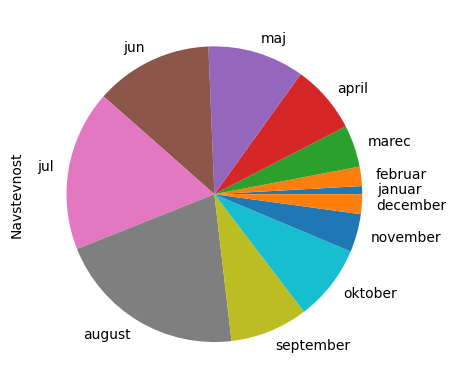

In [16]:
# graficke znazornenie
mesiace=['januar', 'februar', 'marec', 'april', 'maj', 'jun', 'jul', 'august', 'september', 'oktober', 'november', 'december']
nav.plot.pie(labels=mesiace);

In [17]:
# Navstevnost jednotlivych expozicii po mesiacoch
expo = df.groupby(['Expozicia', 'Mesiac'])['Navstevnost'].sum()
expo

Expozicia                Mesiac
Banské múzeum v prírode  1           48
                         2          349
                         3         1746
                         4         3700
                         5         5805
                                   ... 
Starý zámok              8         5239
                         9         2952
                         10        2675
                         11        1452
                         12         835
Name: Navstevnost, Length: 108, dtype: int64

In [18]:
# kontigencna tabulka
navex = df[['Expozicia', 'Mesiac', 'Navstevnost']]
navex

,Expozicia,Mesiac,Navstevnost
0,Banské múzeum v prírode,1,48
1,Nový zámok,1,298
2,Starý zámok,1,405
3,Kammerhof-baníctvo na Slovensku,1,44
4,Berggericht-mineralogická expozícia,1,139
...,...,...,...
103,Berggericht-mineralogická expozícia,12,211
104,Galéria Jozefa Kollára,12,327
105,Glanzenberg štôlňa,12,15
106,Michal štôlňa,12,523


In [19]:
pt = pd.pivot_table(navex, columns='Expozicia', index='Mesiac', values='Navstevnost', aggfunc='sum')
pt

Expozicia,Banské múzeum v prírode,Berggericht-mineralogická expozícia,Galéria Jozefa Kollára,Glanzenberg štôlňa,Handlová,Kammerhof-baníctvo na Slovensku,Michal štôlňa,Nový zámok,Starý zámok
Mesiac,,,,,,,,,
1,48,139,108,0,20,44,238,298,405
2,349,337,185,0,108,147,609,620,772
3,1746,485,152,0,220,533,764,1176,1711
4,3700,508,559,0,299,683,1004,1905,2419
5,5805,737,410,287,128,1049,1154,2683,3363
6,8014,1204,498,266,87,1404,1245,3040,3238
7,9343,1118,623,522,258,1644,3018,5009,4420
8,10869,1398,862,543,455,1720,3559,6124,5239
9,3916,724,467,290,30,557,1180,2471,2952


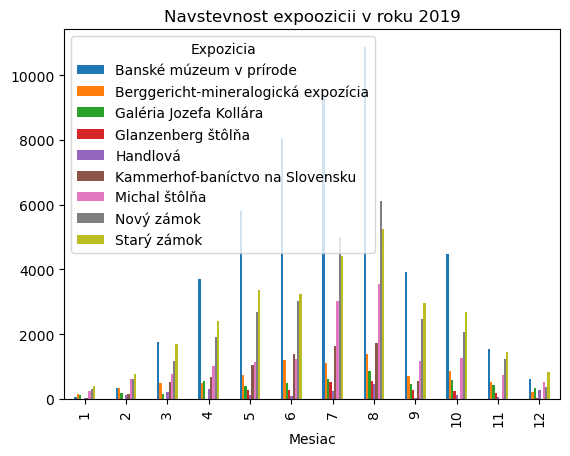

In [20]:
pt.plot.bar();
plt.title('Navstevnost expoozicii v roku 2019');

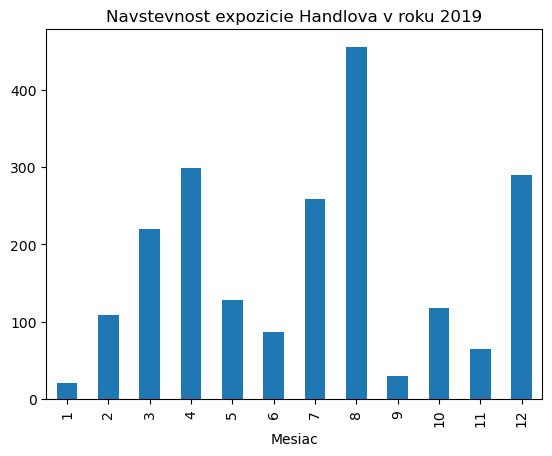

In [21]:
pt['Handlová'].plot.bar();
plt.title('Navstevnost expozicie Handlova v roku 2019');

### Priklad 3. Informacia z dataframe

https://data.gov.sk/dataset/zoznam-psov-chovanych-v-meste-presov

In [22]:
df = pd.read_json('PsyPresov.json')

In [23]:
df.head(5)

,Plemeno,Č._známky,Farba,Nebezpečný_pes,Časť_mesta,Ulica_(chovu_psa),Súp._č.,Orient._č.
0,Maltézky psík,7764,,Nie,Nižná Šebastová,Agátová,7348,3
1,Bišon,7100,,Nie,Nižná Šebastová,Belianska,6389,6
2,Yorkshirský teriér,551,,Nie,Nižná Šebastová,Belianska,6389,6
3,Nemecký ovčiak,1543,,Nie,Nižná Šebastová,Belianska,2099,7
4,Kríženec,8625,,Nie,Nižná Šebastová,Belianska,2101,11


In [82]:
psi = df[['Plemeno', 'Ulica_(chovu_psa)', 'Orient._č.']].rename(columns={'Ulica_(chovu_psa)' : 'Ulica', 'Orient._č.' : 'Cislo'})
psi.head(10)

,Plemeno,Ulica,Cislo
0,Maltézky psík,Agátová,3
1,Bišon,Belianska,6
2,Yorkshirský teriér,Belianska,6
3,Nemecký ovčiak,Belianska,7
4,Kríženec,Belianska,11
5,Rotvajler,Belianska,12
6,Trpasličí pudlík,Belianska,14
7,Bígl,Bociania,9
8,Kríženec,Borovicová,4
9,Nemecký ovčiak,Borovicová,6


In [138]:
# Kolko psov zije na nednotlivych uliciach
psy_uliciach = psi.groupby('Ulica')['Plemeno'].size()
psy_uliciach.head(100)

Ulica
                      1
17. novembra         32
19. januára           2
Agátová               1
Alexandra Matušku     9
                     ..
Jána Pavla II.        1
Jánošíkova           32
K Okruhliaku          4
K Starej tehelni      2
K Surdoku            26
Name: Plemeno, Length: 100, dtype: int64

In [139]:
# Kolko psov zije na ulici Belianska
psy_belianska = len([i for i in psi ['Ulica'] if i == 'Belianska'])
print('Na ulici Belianska je ', psy_belianska, 'psov')
# alebo
psy_uliciach['Belianska']

Na ulici Belianska je  6 psov


6

In [141]:
# Na ktorych uliciach zije najviac psov
najviac_psov = psi.groupby('Ulica').count().sort_values('Plemeno', ascending = False)['Plemeno']
print (najviac_psov.head(5))
# alebo
psy_uliciach.nlargest(10)

Ulica
Prostějovská     115
Švábska           62
Mirka Nešpora     56
Ďumbierska        44
Sabinovská        43
Name: Plemeno, dtype: int64


Ulica
Prostějovská       115
Švábska             62
Mirka Nešpora       56
Ďumbierska          44
Sabinovská          43
Sibírska            41
Antona Prídavka     40
Volgogradská        40
Levočská            39
Mukačevská          37
Name: Plemeno, dtype: int64

In [142]:
# Na ktorych uliciach zije viac psov ako 40
psy_uliciach[psy_uliciach > 40]

Ulica
Mirka Nešpora     56
Prostějovská     115
Sabinovská        43
Sibírska          41
Ďumbierska        44
Švábska           62
Name: Plemeno, dtype: int64

In [144]:
# Kolko psov nema uvedenu ulicu? Akych su plemien?
psy_uliciach['']

1

In [146]:
psi[psi['Ulica'] == '']

,Plemeno,Ulica,Cislo
3189,Nemecký ovčiak,,


In [163]:
# Kolko roznych plemien zije v Presove?
roznych_plemien = psi.groupby('Plemeno').count()['Cislo']
len(roznych_plemien)

216

In [168]:
# Ktore plemena patria medzi 10 najoblubenejsich?
roznych_plemien.nlargest(10)

Plemeno
Kríženec                 747
Yorkshirský teriér       244
Nemecký ovčiak           220
Maltézky psík            171
Labradorský retriever    142
Čivava                   101
Jack Russell Teriér       82
Zlatý retriever           76
Jazvečík                  74
Pudel                     56
Name: Cislo, dtype: int64

In [176]:
# Ktore plemena su ojedinele?
roznych_plemien[roznych_plemien == 1]

Plemeno
Afganský chrt         1
Americký bandog       1
Anglický chrt         1
Anglický farbiar      1
Anglický seter        1
                     ..
čínsky naháč          1
Šetlandský ovčiak     1
Šiba inu              1
Švajčiarsky ovčiak    1
Švajčiarský durič     1
Name: Cislo, Length: 64, dtype: int64